In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r'G:\AI\AI\Homework AI\lesson-2\data\credit_scoring.csv')
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,masters degree,0,married,0,F,employee,0,253875.639453,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,112080.014102,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,145885.952297,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,267628.550329,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,158616.077870,to have a wedding


In [5]:
data = np.loadtxt(r'G:\AI\AI\Homework AI\lesson-2\data\credit_scoring.csv', skiprows=1, delimiter=',', dtype=object)

In [6]:
data

array([['1', '-8437.673027760233', '42', ..., '0', '253875.6394525987',
        'purchase of the house'],
       ['1', '-4024.803753850451', '36', ..., '0', '112080.01410244203',
        'car purchase'],
       ['0', '-5623.422610230956', '33', ..., '0', '145885.95229686378',
        'purchase of the house'],
       ...,
       ['1', '-2113.3468876977263', '38', ..., '1', '89672.56115303475',
        'property'],
       ['3', '-3112.4817051958507', '38', ..., '1', '244093.0505004255',
        'buying my own car'],
       ['2', '-1984.5075885305268', '40', ..., '0', '82047.41889948228',
        'to buy a car']], dtype=object)

In [7]:
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [9]:
len(df)

21525

In [10]:
print(f'{df.isna().sum()/len(df)*100}')

children             0.000000
days_employed       10.099884
dob_years            0.000000
education            0.000000
education_id         0.000000
family_status        0.000000
family_status_id     0.000000
gender               0.000000
income_type          0.000000
debt                 0.000000
total_income        10.099884
purpose              0.000000
dtype: float64


In [11]:
df['days_employed'].mean()

63046.49766147338

In [12]:
df['days_employed'].fillna(df['days_employed'].mean(), inplace=True)

C:\Users\79639\AppData\Local\Temp\ipykernel_12060\3064656559.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['days_employed'].fillna(df['days_employed'].mean(), inplace=True)


In [13]:
df['days_employed'].isna().sum()

0

In [14]:
df['total_income'].isna().sum()

2174

In [15]:
df.loc[df['days_employed'].isna(), 'days_emploed']=df['days_employed'].mean()

In [71]:
for column_name in df.select_dtypes(np.number).columns:
    if df[column_name].isna().sum() > 0:  
        m = df[column_name].mean()  
        df.loc[df[column_name].isna(), column_name] = m

In [17]:
df.isna().sum()

children                0
days_employed           0
dob_years               0
education               0
education_id            0
family_status           0
family_status_id        0
gender                  0
income_type             0
debt                    0
total_income            0
purpose                 0
days_emploed        21525
dtype: int64

In [3]:
from sklearn.impute import SimpleImputer

df2 = df.copy().select_dtypes(np.number)

imputer = SimpleImputer(strategy='mean')
imputer.fit(df2)

,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [4]:
data =imputer.transform(df2)

In [5]:
df2_filled = pd.DataFrame(data=data, columns=df2.columns)

In [6]:
df2_filled

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
0,1.0,-8437.673028,42.0,0.0,0.0,0.0,253875.639453
1,1.0,-4024.803754,36.0,1.0,0.0,0.0,112080.014102
2,0.0,-5623.422610,33.0,1.0,0.0,0.0,145885.952297
3,3.0,-4124.747207,32.0,1.0,0.0,0.0,267628.550329
4,0.0,340266.072047,53.0,1.0,1.0,0.0,158616.077870
...,...,...,...,...,...,...,...
21520,1.0,-4529.316663,43.0,1.0,1.0,0.0,224791.862382
21521,0.0,343937.404131,67.0,1.0,0.0,0.0,155999.806512
21522,1.0,-2113.346888,38.0,1.0,1.0,1.0,89672.561153
21523,3.0,-3112.481705,38.0,1.0,0.0,1.0,244093.050500


In [7]:
df2_filled.isna().sum()

children            0
days_employed       0
dob_years           0
education_id        0
family_status_id    0
debt                0
total_income        0
dtype: int64

In [10]:
imputer.statistics_

array([5.38908246e-01, 6.30464977e+04, 4.32933798e+01, 8.17235772e-01,
       9.72543554e-01, 8.08826945e-02, 1.67422302e+05])

In [11]:
imputer.feature_names_in_

array(['children', 'days_employed', 'dob_years', 'education_id',
       'family_status_id', 'debt', 'total_income'], dtype=object)

In [12]:
df2_filled['children'].describe()

count    21525.000000
mean         0.538908
std          1.381587
min         -1.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         20.000000
Name: children, dtype: float64

<Axes: >

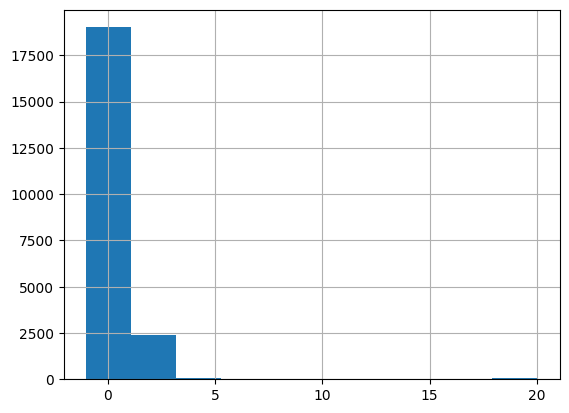

In [10]:
df2['children'].hist(bins=10)

In [15]:
df['children'].quantile(0.99)

3.0

In [18]:
df[df2_filled['children']<0].shape[0]

47

In [ ]:
# df2_filled.loc(df2_filled['children]<0, 'children'] = 0)  # shu usul preffered   df.loc[index, which_column]=value 
df2_filled[df2_filled['children'] < 0] = 0

In [20]:
(df2_filled['children'] < 0).sum()

0

In [21]:
df2_filled[df2_filled['children'] > 3] = 3

In [25]:
(df2_filled['children'] > 3).sum()

0

### Feature Scaling or Data Transformation

In [26]:
df.select_dtypes(np.number)

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
0,1,-8437.673028,42,0,0,0,253875.639453
1,1,-4024.803754,36,1,0,0,112080.014102
2,0,-5623.422610,33,1,0,0,145885.952297
3,3,-4124.747207,32,1,0,0,267628.550329
4,0,340266.072047,53,1,1,0,158616.077870
...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,1,1,0,224791.862382
21521,0,343937.404131,67,1,0,0,155999.806512
21522,1,-2113.346888,38,1,1,1,89672.561153
21523,3,-3112.481705,38,1,0,1,244093.050500


In [28]:
df.select_dtypes(np.number).describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


### Standartization

In [5]:
df_n = df.select_dtypes(np.number).copy()

In [32]:
df_scaled = (df_n - df_n.mean())/df_n.std()

In [33]:
df_scaled.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,2.152500e+04,1.935100e+04,2.152500e+04,2.152500e+04,2.152500e+04,2.152500e+04,1.935100e+04
mean,-5.281618e-18,-4.039052e-17,-1.716526e-16,-6.849599e-18,2.739840e-17,3.697133e-17,1.259450e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.113870e+00,-5.782646e-01,-3.442927e+00,-1.490930e+00,-6.847338e-01,-2.966417e-01,-1.425200e+00
25%,-3.900645e-01,-4.671957e-01,-8.185861e-01,3.334272e-01,-6.847338e-01,-2.966417e-01,-6.251158e-01
50%,-3.900645e-01,-4.562316e-01,-1.028567e-01,3.334272e-01,-6.847338e-01,-2.966417e-01,-2.175782e-01
75%,3.337405e-01,-4.497536e-01,7.719238e-01,3.334272e-01,1.933112e-02,-2.966417e-01,3.497350e-01
max,1.408604e+01,2.405136e+00,2.521485e+00,5.806499e+00,2.131526e+00,3.370913e+00,2.037632e+01


In [34]:
df_n

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
0,1,-8437.673028,42,0,0,0,253875.639453
1,1,-4024.803754,36,1,0,0,112080.014102
2,0,-5623.422610,33,1,0,0,145885.952297
3,3,-4124.747207,32,1,0,0,267628.550329
4,0,340266.072047,53,1,1,0,158616.077870
...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,1,1,0,224791.862382
21521,0,343937.404131,67,1,0,0,155999.806512
21522,1,-2113.346888,38,1,1,1,89672.561153
21523,3,-3112.481705,38,1,0,1,244093.050500


In [39]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

imputer.fit(df_n)

data = imputer.transform(df_n)

In [43]:
data.shape

(21525, 7)

In [46]:
np.mean(data)

32930.64325995777

In [47]:
(data - np.mean(data, axis=0))/np.std(data, axis=0)

array([[ 0.3337483 , -0.53537007, -0.10285906, ..., -0.68474972,
        -0.29664862,  0.88551422],
       [ 0.3337483 , -0.50232054, -0.58002311, ..., -0.68474972,
        -0.29664862, -0.56685357],
       [-0.39007358, -0.51429316, -0.81860513, ..., -0.68474972,
        -0.29664862, -0.22059003],
       ...,
       [ 0.3337483 , -0.48800497, -0.42096842, ...,  0.01933157,
         3.37099157, -0.79636603],
       [ 1.78139207, -0.49548784, -0.42096842, ..., -0.68474972,
         3.37099157,  0.78531425],
       [ 1.05757018, -0.48704005, -0.26191374, ..., -0.68474972,
        -0.29664862, -0.87446795]])

In [65]:
# Using Scikit learn
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(data)
scl_data = scaler.transform(data)

In [49]:
scl_data

array([[ 0.3337483 , -0.53537007, -0.10285906, ..., -0.68474972,
        -0.29664862,  0.88551422],
       [ 0.3337483 , -0.50232054, -0.58002311, ..., -0.68474972,
        -0.29664862, -0.56685357],
       [-0.39007358, -0.51429316, -0.81860513, ..., -0.68474972,
        -0.29664862, -0.22059003],
       ...,
       [ 0.3337483 , -0.48800497, -0.42096842, ...,  0.01933157,
         3.37099157, -0.79636603],
       [ 1.78139207, -0.49548784, -0.42096842, ..., -0.68474972,
         3.37099157,  0.78531425],
       [ 1.05757018, -0.48704005, -0.26191374, ..., -0.68474972,
        -0.29664862, -0.87446795]])

In [88]:
class StandartScalerCustom:
    def __init__(self):
        self.mean_ = None
        self.scale_ = None
        self.is_fitted_ = False
        self.n_features_in = None

    def fit(self, X):
        X = np.array(X)
        self.n_features_in = X.shape[1]
        self.mean_= X.mean(axis=0)
        self.scale_ = X.std(axis=0) 
        self.is_fitted_=True
        return self

    def transform(self, X):
        if self.is_fitted_ == False:
            raise Exception("Please fit first")    
        X = np.array(X)
        if self.n_features_in==X.shape[1]:
            return (X-self.mean_)/self.scale_   

In [89]:
stn_scl_c = StandartScalerCustom()
stn_scl_c.fit(df_n)

In [90]:
stn_scl_c.transform(df_n)

array([[ 0.3337483 ,         nan, -0.10285906, ..., -0.68474972,
        -0.29664862,         nan],
       [ 0.3337483 ,         nan, -0.58002311, ..., -0.68474972,
        -0.29664862,         nan],
       [-0.39007358,         nan, -0.81860513, ..., -0.68474972,
        -0.29664862,         nan],
       ...,
       [ 0.3337483 ,         nan, -0.42096842, ...,  0.01933157,
         3.37099157,         nan],
       [ 1.78139207,         nan, -0.42096842, ..., -0.68474972,
         3.37099157,         nan],
       [ 1.05757018,         nan, -0.26191374, ..., -0.68474972,
        -0.29664862,         nan]])

In [91]:
# Normalization

df_norm = (df_n-df_n.min())/(df_n.max()-df_n.min())

In [93]:
df_norm.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,19351.000000
mean,0.073281,0.193827,0.577245,0.204309,0.243136,0.080883,0.065372
std,0.065790,0.335188,0.167661,0.137035,0.355081,0.272661,0.045868
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.047619,0.037229,0.440000,0.250000,0.000000,0.000000,0.036699
50%,0.047619,0.040904,0.560000,0.250000,0.000000,0.000000,0.055392
75%,0.095238,0.043075,0.706667,0.250000,0.250000,0.000000,0.081413
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()

mm_scaler.fit(df_n)
df_n_mm_scaled = mm_scaler.transform(df_n)

In [7]:
pd.DataFrame(columns = mm_scaler.feature_names_in_, data = df_n_mm_scaled).describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,19351.000000
mean,0.073281,0.193827,0.577245,0.204309,0.243136,0.080883,0.065372
std,0.065790,0.335188,0.167661,0.137035,0.355081,0.272661,0.045868
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.047619,0.037229,0.440000,0.250000,0.000000,0.000000,0.036699
50%,0.047619,0.040904,0.560000,0.250000,0.000000,0.000000,0.055392
75%,0.095238,0.043075,0.706667,0.250000,0.250000,0.000000,0.081413
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1]:
import pandas as pd
data = {'bridge_types': ['suspension', 'arch', 'beam', 'cable-stayed']}
bridge_df = pd.DataFrame(data)

In [2]:
bridge_df.dtypes

bridge_types    object
dtype: object

In [3]:
bridge_df['bridge_types'] = bridge_df['bridge_types'].astype('category')

In [5]:
bridge_df.dtypes

bridge_types    category
dtype: object

In [8]:
bridge_df['bridge_types'] = bridge_df['bridge_types'].cat.codes

In [9]:
bridge_df

,bridge_types
0,3
1,0
2,1
3,2


### LabelEncoding with sklearn

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
data = {'bridge_types': ['suspension', 'arch', 'beam', 'cable-stayed']}
bridge_df = pd.DataFrame(data).values

In [8]:
bridge_df

array([['suspension'],
       ['arch'],
       ['beam'],
       ['cable-stayed']], dtype=object)

In [10]:
bridge_df = bridge_df.reshape(-1)

In [11]:
lb_encoder = LabelEncoder()
lb_encoder.fit(bridge_df)
lb_encoder.transform(bridge_df)

array([3, 0, 1, 2])

In [14]:
import numpy as np
lb_encoder.inverse_transform(np.array([3, 0, 1, 2]))

array(['suspension', 'arch', 'beam', 'cable-stayed'], dtype=object)

### OneHotEncoding

In [34]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv(r'G:\AI\AI\Homework AI\lesson-2\data\credit_scoring.csv')
gender = df[['gender']][df['gender'].str.lower().isin(['f', 'm'])]
gender.value_counts()

gender
F         14236
M          7288
Name: count, dtype: int64

In [36]:
gender.shape


(21524, 1)

In [35]:
one_hot_enc = OneHotEncoder()
one_hot_enc.fit_transform(gender)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 21524 stored elements and shape (21524, 2)>